In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from textwrap import wrap

In [2]:
retail_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Simplilearn Projects/Data Science Capstone project/Retail/Online Retail.xlsx')

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Checking and working with missing values

In [4]:
# Inspect the missing values in the datasets

print(retail_df.shape)

(541909, 8)


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Handling the missing values

In [7]:
print(round(retail_df.isna().sum()/retail_df.shape[0]*100,2))

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


As we can see the two columns constitute most of the null values
- Description columns - 0.27% of null values 
- CustomerId - 25% of null values

for Description columns we can drop since null values is very miniscule 

But customerId is very important variable and 25% means 1/4 of the data so we need to make sure there is nothing we can do before droping the data


In [8]:
invoice_null_custid = retail_df[retail_df['CustomerID'].isna()]['InvoiceNo'].unique()

In [9]:
retail_df[retail_df['InvoiceNo'].isin(invoice_null_custid) & (~retail_df['CustomerID'].isna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We tried to find the customer id with help of the invoice number to see if we could get any customerId that we can impute but nothing came

perhabs the customer refused to share the customer details

- So we have no way to impute the customerId details so we can drop the rows where customerid is null
- As for the Description we can safely drop the column since we already have Stock code columns that is not null


In [10]:
retail_df1 = retail_df.drop('Description', axis=1)

In [11]:
retail_df1 = retail_df1.dropna()
retail_df1.shape

(406829, 7)

### Removing the duplicates

For removing the duplicates we will consider all the records to see if any row is repeated

In [12]:
retail_df1 = retail_df1.drop_duplicates()
retail_df1.shape

(401602, 7)

So there were 5227 duplicates records were removed

#### Performing the Descriptive analysis of the data

- CustomerId columns is represented by float which should have been object type

In [13]:
retail_df1['CustomerID'] = retail_df1['CustomerID'].astype(str)

In [14]:
retail_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401602 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401602 non-null  object        
 1   StockCode    401602 non-null  object        
 2   Quantity     401602 non-null  int64         
 3   InvoiceDate  401602 non-null  datetime64[ns]
 4   UnitPrice    401602 non-null  float64       
 5   CustomerID   401602 non-null  object        
 6   Country      401602 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.5+ MB


In [15]:
retail_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401602.0,12.182579,250.283248,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401602.0,3.474064,69.764209,0.0,1.25,1.95,3.75,38970.0


- As we cann see that total on avg people buy 12 quantity of goods from store. Also we see that min quantity is in negetive so there are some invoice for returning of items

- Unit price : Average unit price of the items is 3 and max is 38970 orders

In [16]:
retail_df1.describe(include=['O']).T

,count,unique,top,freq
InvoiceNo,401602,22190,576339,542
StockCode,401602,3684,85123A,2065
CustomerID,401602,4372,17841.0,7812
Country,401602,37,United Kingdom,356726


## Data Transformation

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 

- Create month cohorts and analyze active customers for each cohort.
- Analyze the retention rate of customers.


In [17]:
# a Function to return the month of the invoice

def ret_month(x): return dt.datetime(x.year, x.month, 1)

# Create a invoice date column based on the invoice month and store it in invoice_month 

retail_df1['invoice_month'] = retail_df1['InvoiceDate'].apply(ret_month)

In [18]:
retail_df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [19]:
# Group the customerId and select the invoice_month

grouping = retail_df1.groupby('CustomerID')['invoice_month']

# Assign the min Invoice month value to the dataset

retail_df1['cohortMonth'] = grouping.transform('min')

print(retail_df1.head())

  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55    17850.0   
1    536365     71053         6 2010-12-01 08:26:00       3.39    17850.0   
2    536365    84406B         8 2010-12-01 08:26:00       2.75    17850.0   
3    536365    84029G         6 2010-12-01 08:26:00       3.39    17850.0   
4    536365    84029E         6 2010-12-01 08:26:00       3.39    17850.0   

          Country invoice_month cohortMonth  
0  United Kingdom    2010-12-01  2010-12-01  
1  United Kingdom    2010-12-01  2010-12-01  
2  United Kingdom    2010-12-01  2010-12-01  
3  United Kingdom    2010-12-01  2010-12-01  
4  United Kingdom    2010-12-01  2010-12-01  


Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [20]:
def get_date_int(df, columns):
  year = df[columns].dt.year
  month = df[columns].dt.month
  day = df[columns].dt.day
  return year, month, day


invoice_year, invoice_month, _ = get_date_int(retail_df1, 'invoice_month')
cohort_year, cohort_month, _ = get_date_int(retail_df1, 'cohortMonth')


Now we'll calculate the difference between cohort month and invoice month and same as year to get the  cohort offset which will be used to calculate the retention rate

In [21]:
# get the difference in year

year_diff = invoice_year - cohort_year 

# Get the difference in months
month_diff = invoice_month - cohort_month

retail_df1['CohortIndex'] = year_diff*12 + month_diff + 1

print(retail_df1.head())

  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55    17850.0   
1    536365     71053         6 2010-12-01 08:26:00       3.39    17850.0   
2    536365    84406B         8 2010-12-01 08:26:00       2.75    17850.0   
3    536365    84029G         6 2010-12-01 08:26:00       3.39    17850.0   
4    536365    84029E         6 2010-12-01 08:26:00       3.39    17850.0   

          Country invoice_month cohortMonth  CohortIndex  
0  United Kingdom    2010-12-01  2010-12-01            1  
1  United Kingdom    2010-12-01  2010-12-01            1  
2  United Kingdom    2010-12-01  2010-12-01            1  
3  United Kingdom    2010-12-01  2010-12-01            1  
4  United Kingdom    2010-12-01  2010-12-01            1  


In [22]:
retail_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401602 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      401602 non-null  object        
 1   StockCode      401602 non-null  object        
 2   Quantity       401602 non-null  int64         
 3   InvoiceDate    401602 non-null  datetime64[ns]
 4   UnitPrice      401602 non-null  float64       
 5   CustomerID     401602 non-null  object        
 6   Country        401602 non-null  object        
 7   invoice_month  401602 non-null  datetime64[ns]
 8   cohortMonth    401602 non-null  datetime64[ns]
 9   CohortIndex    401602 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 33.7+ MB


In [23]:
# Counting the daily active users in each cohorts

grouping = retail_df1.groupby(['cohortMonth', 'CohortIndex'])

# Counting the no of unique customer id falling in each group

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# Assign the column names to the dataframe created above

cohort_counts = cohort_data.pivot_table(index = 'cohortMonth',
                                        columns = 'CohortIndex',
                                        values = 'CustomerID')

In [24]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Calculate the retention rate 
# Retention rate: The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

cohort_size = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_size, axis =0)
average_standard_cost = retention.round(3)*100


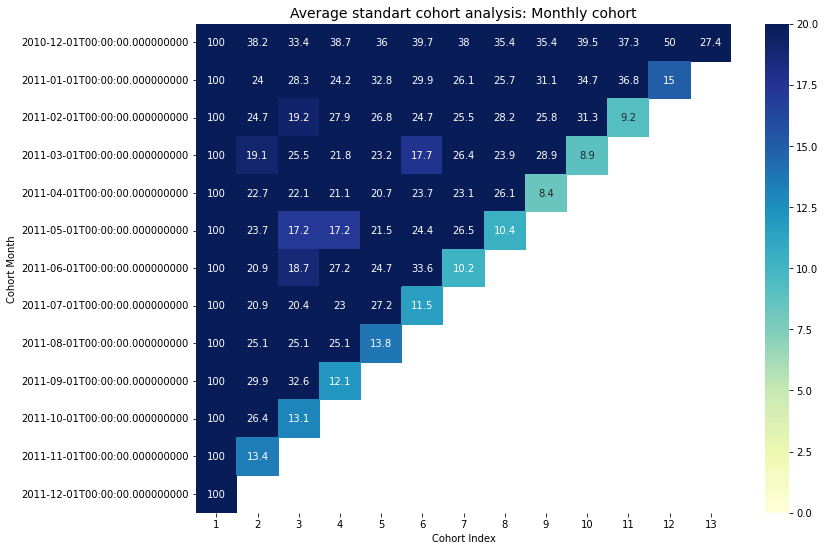

In [26]:
# average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')

# Vizualising the retention rate

plt.figure(figsize= (12,9))
plt.title("Average standart cohort analysis: Monthly cohort", fontsize=14)
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()


## Building the RFM metrics

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

### Calculating the Recency

how recently the customer has made the purchase

In [27]:
retail_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401602 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      401602 non-null  object        
 1   StockCode      401602 non-null  object        
 2   Quantity       401602 non-null  int64         
 3   InvoiceDate    401602 non-null  datetime64[ns]
 4   UnitPrice      401602 non-null  float64       
 5   CustomerID     401602 non-null  object        
 6   Country        401602 non-null  object        
 7   invoice_month  401602 non-null  datetime64[ns]
 8   cohortMonth    401602 non-null  datetime64[ns]
 9   CohortIndex    401602 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 33.7+ MB


In [28]:
df_recency = retail_df1.groupby(by='CustomerID', as_index = False)['invoice_month'].max()
df_recency.columns = ['CustomerID', 'last_purchase']

recent = df_recency['last_purchase'].max()

df_recency['Recency'] = df_recency['last_purchase'].apply(
    lambda x: (recent - x).days
)

In [29]:
df_recency.head()

,CustomerID,last_purchase,Recency
0,12346.0,2011-01-01,334
1,12347.0,2011-12-01,0
2,12348.0,2011-09-01,91
3,12349.0,2011-11-01,30
4,12350.0,2011-02-01,303


### Calculating the frequency:
How frequent the customer buys from the site

In [30]:
# Calculating the frequency
# Here we are calculating the frequent transaction of purchase of any items

df_frequency = retail_df1.groupby(by='CustomerID', as_index = False)['invoice_month'].count()
df_frequency.columns = ['CustomerID', 'frequency']

In [31]:
df_frequency

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,721


### Calculating the monetary:
How much the customer spend for purchase in the time period

In [32]:
retail_df1['Total_sales'] = retail_df1['Quantity']* retail_df1['UnitPrice']

df_monetary = retail_df1.groupby(by='CustomerID', as_index = False)['Total_sales'].sum()
df_monetary.columns = ['CustomerID', 'Monetary']

In [33]:
df_monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


### Merging into one RFM metrics

In [34]:
df_rf = df_recency.merge(df_frequency ,on='CustomerID')
df_rfm = df_rf.merge(df_monetary, on='CustomerID')

df_rfm.head()

,CustomerID,last_purchase,Recency,frequency,Monetary
0,12346.0,2011-01-01,334,2,0.00
1,12347.0,2011-12-01,0,182,4310.00
2,12348.0,2011-09-01,91,31,1797.24
3,12349.0,2011-11-01,30,73,1757.55
4,12350.0,2011-02-01,303,17,334.40


Now we have how recentrly the customer made the purchase, how frequently the customer made the purchase and how much the customer has spend over time

Now lets examine the distribution of out recency, frequency and montary parameter before we move further

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

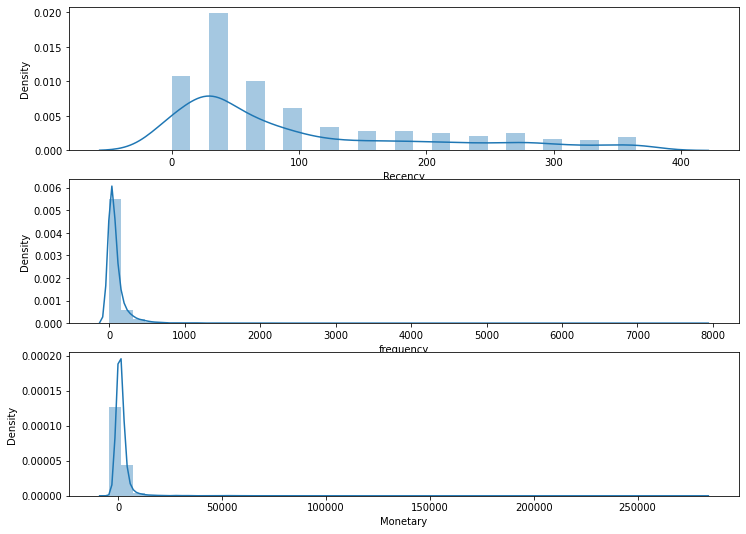

In [35]:
# Plot the RFM distribution

plt.figure(figsize=(12,9))
plt.subplot(3,1,1); sns.distplot(df_rfm['Recency'])
plt.subplot(3,1,2); sns.distplot(df_rfm['frequency'])
plt.subplot(3,1,3); sns.distplot(df_rfm['Monetary'])
plt.show()

With the above distribution, we came to know about the skewedness about the RFM. 
This information will come in handy when we will examine the customer segmentation using the K-mean 

Now lets group these values into quantile using .qcut() on RFM 

In [36]:
df_rfm.head()

,CustomerID,last_purchase,Recency,frequency,Monetary
0,12346.0,2011-01-01,334,2,0.00
1,12347.0,2011-12-01,0,182,4310.00
2,12348.0,2011-09-01,91,31,1797.24
3,12349.0,2011-11-01,30,73,1757.55
4,12350.0,2011-02-01,303,17,334.40


In [37]:
# Calculating the R-group

# Grouping R-values
r_label = range(4,0,-1)
r_group = pd.qcut(df_rfm['Recency'], q=4, labels = r_label)

# Grouping F-values

f_label = range(1,5)
f_group = pd.qcut(df_rfm['frequency'], q=4, labels = f_label)

# Grouping M-values

m_label = range(1,5)
m_group = pd.qcut(df_rfm['Monetary'], q=4, labels = m_label)

# Create the new columns for R,F,M

df_rfm = df_rfm.assign(R = r_group.values, F = f_group.values, M = m_group.values)

df_rfm.head()

,CustomerID,last_purchase,Recency,frequency,Monetary,R,F,M
0,12346.0,2011-01-01,334,2,0.00,1,1,1
1,12347.0,2011-12-01,0,182,4310.00,4,4,4
2,12348.0,2011-09-01,91,31,1797.24,2,2,4
3,12349.0,2011-11-01,30,73,1757.55,4,3,4
4,12350.0,2011-02-01,303,17,334.40,1,1,2


In [38]:
df_rfm.head()

,CustomerID,last_purchase,Recency,frequency,Monetary,R,F,M
0,12346.0,2011-01-01,334,2,0.00,1,1,1
1,12347.0,2011-12-01,0,182,4310.00,4,4,4
2,12348.0,2011-09-01,91,31,1797.24,2,2,4
3,12349.0,2011-11-01,30,73,1757.55,4,3,4
4,12350.0,2011-02-01,303,17,334.40,1,1,2


We created 4 labels for r_label, f_labels, m_labels where 4th is the best quantile and 1 is the least quantile. we then created the R, F, M columns and assign the values of the group

Finally with these R, F, M score we can segment the customer
by first adding the individual score together

In [39]:
df_rfm['RFM_score']= df_rfm[['R','F','M']].sum(axis=1)
df_rfm.head(15)

,CustomerID,last_purchase,Recency,frequency,Monetary,R,F,M,RFM_score
0,12346.0,2011-01-01,334,2,0.00,1,1,1,3
1,12347.0,2011-12-01,0,182,4310.00,4,4,4,12
2,12348.0,2011-09-01,91,31,1797.24,2,2,4,8
3,12349.0,2011-11-01,30,73,1757.55,4,3,4,11
4,12350.0,2011-02-01,303,17,334.40,1,1,2,4
5,12352.0,2011-11-01,30,95,1545.41,4,3,3,10
6,12353.0,2011-05-01,214,4,89.00,1,1,1,3
7,12354.0,2011-04-01,244,58,1079.40,1,3,3,7
8,12355.0,2011-05-01,214,13,459.40,1,1,2,4
9,12356.0,2011-11-01,30,59,2811.43,4,3,4,11


In [40]:
df_rfm.groupby('RFM_score')['RFM_score'].sum()

RFM_score
3     1101
4     1328
5     2190
6     2892
7     2786
8     3888
9     3348
10    4840
11    4081
12    7704
Name: RFM_score, dtype: int64

Now that we have found the total RFM score it is time to define customer levels based on these score 

- RFM_score > 9 : Most Valued customer
- RFM_score >= 8 and < 9 : Champion customer
- RFM_score >= 8 and < 8 : Loyal customer
- RFM_score >= 6 and < 7 : Potential customer
- RFM_score >=5 and < 6 :  Promising customer
- RFM_score >=4 and < 5 :  Needs Attention
- RFM_Score < 3 : Require urgent action

In [41]:
def rfm_level(df):
  if df['RFM_score'] >= 9 :
    return 'Most valued Customer'
  elif (df['RFM_score']) >= 8 and (df['RFM_score']) < 9 :
    return 'Champion'
  elif (df['RFM_score']) >= 7 and (df['RFM_score']) < 8 :
    return 'Loyal Customer'
  elif (df['RFM_score']) >= 6 and (df['RFM_score']) < 7 :
    return 'potential Customer'
  elif (df['RFM_score']) >= 5 and (df['RFM_score']) < 6 :
    return 'Promising Customer'
  elif (df['RFM_score']) >= 4 and (df['RFM_score']) < 5 :
    return 'Needs Attention'
  else:
    return 'Require Activation'

df_rfm['RFM_levels'] = df_rfm.apply(rfm_level, axis = 1)

df_rfm.head()

,CustomerID,last_purchase,Recency,frequency,Monetary,R,F,M,RFM_score,RFM_levels
0,12346.0,2011-01-01,334,2,0.00,1,1,1,3,Require Activation
1,12347.0,2011-12-01,0,182,4310.00,4,4,4,12,Most valued Customer
2,12348.0,2011-09-01,91,31,1797.24,2,2,4,8,Champion
3,12349.0,2011-11-01,30,73,1757.55,4,3,4,11,Most valued Customer
4,12350.0,2011-02-01,303,17,334.40,1,1,2,4,Needs Attention


Finally we can group them by RFM_levels

In [42]:
rfm_level_agg = df_rfm.groupby('RFM_levels').agg({
    
    'Recency': 'mean',
    'frequency' : 'mean',
    'Monetary' : ['mean', 'count']

}).round(1)

In [43]:
print(rfm_level_agg)

                     Recency frequency Monetary      
                        mean      mean     mean count
RFM_levels                                           
Champion                68.6      47.5    857.6   486
Loyal Customer          92.8      36.2    643.1   398
Most valued Customer    31.6     179.8   3812.6  1869
Needs Attention        203.2      13.9    211.7   332
Promising Customer     180.5      21.0    350.6   438
Require Activation     277.3       7.8    125.0   367
potential Customer     100.1      23.6    434.9   482


In [44]:
file_name1 = 'rfm_levels.xlsx'


In [45]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


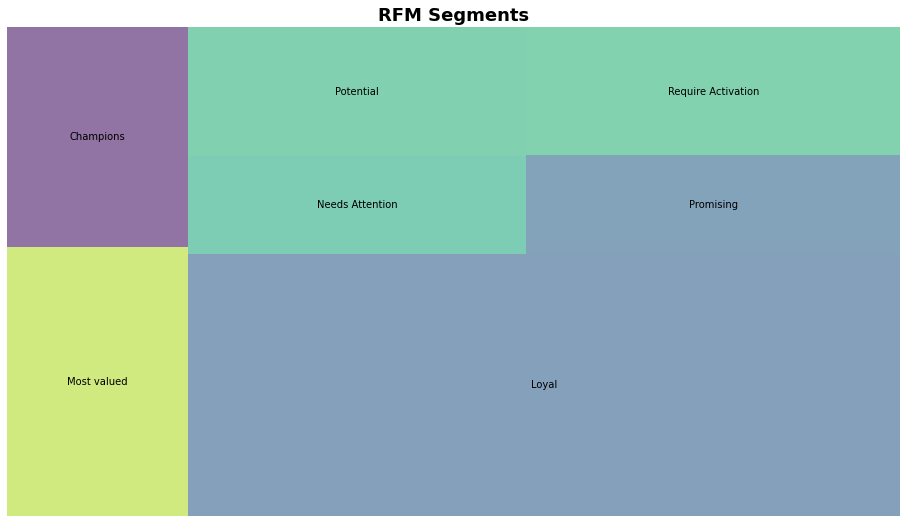

In [46]:
import squarify

rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Most valued',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

## Creating Clusters using K-Means clustering

On this final part, we will continue to work on the RFM dataframe that we created earlier and apply K-means clustering to segment out customer data. We will continue to work on the feature RFM score that was created in earlier section

### K-Means Clustering:

K-means clustering is an unsupervised machine learning algorithms. k-means algorithms identifies k-centroid and allocates the data points to its respective centroid while keeping mean distance as small as possible

### Basic assumptions:
We will be using the RFM features engineered in the previous section for segmenting. But before we get into it we must ensure that these features fulfill basic assumption for the K-means and these are -

- Distribution of the variable should be normally distributed
- Variable with same average value 
- Variable with same variance

1 can be address by looking at the distribution of the RFM and applying log transformation if needed 
2 & 3 can be address with scaling the variable to standard scaler of sklearn library

### Prepraring the data

#### Data skewness

Lets examine the distribution of the variable

In [47]:
df_rfm.head()

,CustomerID,last_purchase,Recency,frequency,Monetary,R,F,M,RFM_score,RFM_levels
0,12346.0,2011-01-01,334,2,0.00,1,1,1,3,Require Activation
1,12347.0,2011-12-01,0,182,4310.00,4,4,4,12,Most valued Customer
2,12348.0,2011-09-01,91,31,1797.24,2,2,4,8,Champion
3,12349.0,2011-11-01,30,73,1757.55,4,3,4,11,Most valued Customer
4,12350.0,2011-02-01,303,17,334.40,1,1,2,4,Needs Attention


In [48]:
df_rfm.to_excel("rfm_score.xlsx")

In [49]:
df_final = df_rfm[['CustomerID','Recency', 'frequency','Monetary']]
df_final.head()

,CustomerID,Recency,frequency,Monetary
0,12346.0,334,2,0.00
1,12347.0,0,182,4310.00
2,12348.0,91,31,1797.24
3,12349.0,30,73,1757.55
4,12350.0,303,17,334.40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

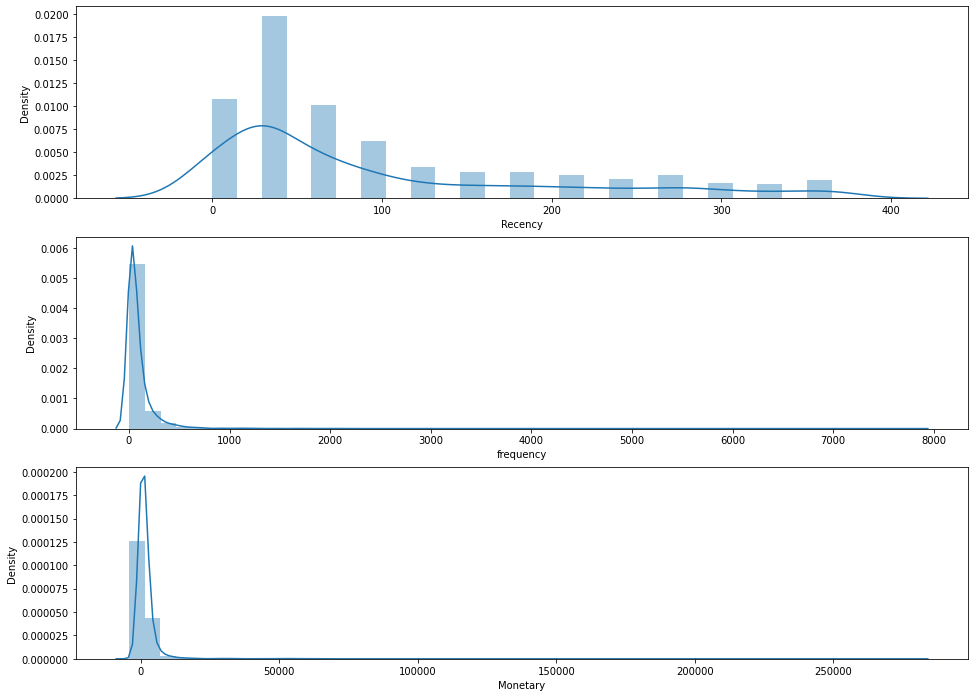

In [50]:
plt.figure(figsize=(16,12))

plt.subplot(3,1,1); sns.distplot(df_final['Recency'])
plt.subplot(3,1,2); sns.distplot(df_final['frequency'])
plt.subplot(3,1,3); sns.distplot(df_final['Monetary'])

plt.show()

As we can see that there is a general skewness to the right. to address this we will apply logarithmic transformation



In [51]:
# we added 0.0001 to recency and monetary variable as these varibale have 0 values and log will not work

df_final['Recency'] = df_final['Recency'] + 0.00000001
df_final['Monetary'] = df_final['Monetary'] + 0.00000001

recency_log = np.log(df_final['Recency'])
frequency_log = np.log(df_final['frequency'])
Monetary_log = np.log(df_final['Monetary'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

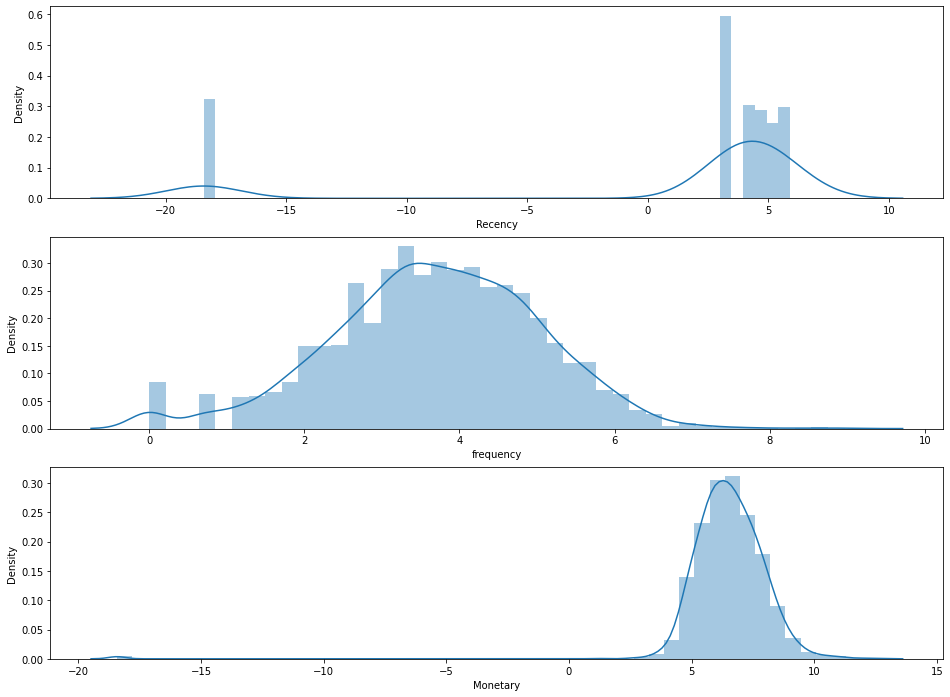

In [52]:
plt.figure(figsize=(16,12))

plt.subplot(3,1,1); sns.distplot(recency_log)
plt.subplot(3,1,2); sns.distplot(frequency_log)
plt.subplot(3,1,3); sns.distplot(Monetary_log)

plt.show()

In [53]:
# df_rfm = df_rfm.assign(R = r_group.values, F = f_group.values, M = m_group.values)

df_final = df_final.assign(Recency_log = recency_log.values, 
                           Frequency_log = frequency_log.values,
                           Monetary_log = Monetary_log.values)

df_final.head()

,CustomerID,Recency,frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,12346.0,3.340000e+02,2,1.000000e-08,5.811141,0.693147,-18.420681
1,12347.0,1.000000e-08,182,4.310000e+03,-18.420681,5.204007,8.368693
2,12348.0,9.100000e+01,31,1.797240e+03,4.510860,3.433987,7.494007
3,12349.0,3.000000e+01,73,1.757550e+03,3.401197,4.290459,7.471676
4,12350.0,3.030000e+02,17,3.344000e+02,5.713733,2.833213,5.812338


#### Scaling the dataset

To centralize the means and same standard deviation lets use Standardscaler from the sklearn library

In [54]:
df_final.head()

,CustomerID,Recency,frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,12346.0,3.340000e+02,2,1.000000e-08,5.811141,0.693147,-18.420681
1,12347.0,1.000000e-08,182,4.310000e+03,-18.420681,5.204007,8.368693
2,12348.0,9.100000e+01,31,1.797240e+03,4.510860,3.433987,7.494007
3,12349.0,3.000000e+01,73,1.757550e+03,3.401197,4.290459,7.471676
4,12350.0,3.030000e+02,17,3.344000e+02,5.713733,2.833213,5.812338


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_final[['Recency_sc', 'Frequency_sc', 'Monetary_sc']] = scaler.fit_transform(df_final[['Recency_log', 'Frequency_log','Monetary_log']])


In [56]:
df_final.head()

,CustomerID,Recency,frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Recency_sc,Frequency_sc,Monetary_sc
0,12346.0,3.340000e+02,2,1.000000e-08,5.811141,0.693147,-18.420681,0.601557,-2.232793,-13.192521
1,12347.0,1.000000e-08,182,4.310000e+03,-18.420681,5.204007,8.368693,-2.307388,1.143915,0.998384
2,12348.0,9.100000e+01,31,1.797240e+03,4.510860,3.433987,7.494007,0.445463,-0.181074,0.535044
3,12349.0,3.000000e+01,73,1.757550e+03,3.401197,4.290459,7.471676,0.312252,0.460058,0.523215
4,12350.0,3.030000e+02,17,3.344000e+02,5.713733,2.833213,5.812338,0.589864,-0.630797,-0.355772


In [57]:
df_final.drop(columns=['Recency_log','Frequency_log','Monetary_log'], axis =1, inplace = True)

In [58]:
df_final.describe().round(2)

,Recency,frequency,Monetary,Recency_sc,Frequency_sc,Monetary_sc
count,4372.00,4372.00,4372.00,4372.00,4372.00,4331.00
mean,97.42,91.86,1893.41,-0.00,0.00,0.00
std,101.04,229.22,8218.23,1.00,1.00,1.00
min,0.00,1.00,-4287.63,-2.31,-2.75,-13.19
25%,30.00,17.00,291.80,0.31,-0.63,-0.41
50%,61.00,41.00,644.07,0.40,0.03,-0.00
75%,153.00,99.25,1608.34,0.51,0.69,0.48
max,365.00,7812.00,279489.02,0.61,3.96,3.21


Now that we have fulfilled all the assumption it is time to apply the K-means clustering

### Applying the K-means Clustering

Before we apply the clustering mechanism we need to find the number of cluster which we can do so by applying the elbow method

#### Elbow Method: 
In elbow method, we apply the clustering by varying the number of clusters and measure the SSE from centroid to their data point. we choose the optimal cluster where the reduction in SSE is less 

In [59]:
df_final.isna().sum()

CustomerID       0
Recency          0
frequency        0
Monetary         0
Recency_sc       0
Frequency_sc     0
Monetary_sc     41
dtype: int64

In [60]:
df_final_sc = df_final.dropna()

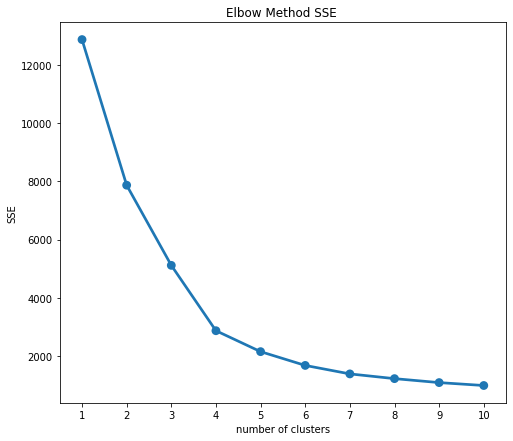

In [61]:
from sklearn.cluster import KMeans
sse = {}


for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state = 42)
  kmeans.fit(df_final_sc[['Recency_sc', 'Frequency_sc','Monetary_sc']])
  sse[k] = kmeans.inertia_

# plt the kmeans for each k

plt.figure(figsize=(8,7))
plt.title("Elbow Method SSE ")
sns.pointplot(x = list(sse.keys()), y=list(sse.values()))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()



In [62]:
sse

{1: 12857.668134019103,
 2: 7863.810846104223,
 3: 5114.9256084312265,
 4: 2873.461341869742,
 5: 2155.790756029397,
 6: 1683.1774938775507,
 7: 1392.3771093867038,
 8: 1230.2268423901767,
 9: 1094.3302682759222,
 10: 994.5696087095248}

In [63]:
df_inr = pd.DataFrame(data= sse, index = [0])

In [64]:
df_inr = df_inr.T

In [65]:
df_inr.to_excel("inertia_info.xlsx")

Idenally we would want to choose cluster where SSE stop descreasing drastically. So for our model we will choose K=4

In [66]:
print(df_final_sc.shape)
print(df_final.shape)

(4331, 7)
(4372, 7)


In [67]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_final_sc[['Recency_sc', 'Frequency_sc','Monetary_sc']])

cluster_labels = kmeans.labels_

df_final_sc = df_final_sc.assign(Clusters = cluster_labels+1)

df_final_sc.head()

,CustomerID,Recency,frequency,Monetary,Recency_sc,Frequency_sc,Monetary_sc,Clusters
0,12346.0,3.340000e+02,2,1.000000e-08,0.601557,-2.232793,-13.192521,4
1,12347.0,1.000000e-08,182,4.310000e+03,-2.307388,1.143915,0.998384,1
2,12348.0,9.100000e+01,31,1.797240e+03,0.445463,-0.181074,0.535044,2
3,12349.0,3.000000e+01,73,1.757550e+03,0.312252,0.460058,0.523215,2
4,12350.0,3.030000e+02,17,3.344000e+02,0.589864,-0.630797,-0.355772,3


In [68]:
df_final_sc.groupby(['Clusters']).agg({
    'Recency': 'mean',
    'frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(0)

Recency frequency Monetary      
            mean      mean     mean count
Clusters                                 
1            0.0     227.0   5611.0   677
2           77.0     118.0   2092.0  1842
3          152.0      17.0    355.0  1798
4           94.0      28.0      0.0    14

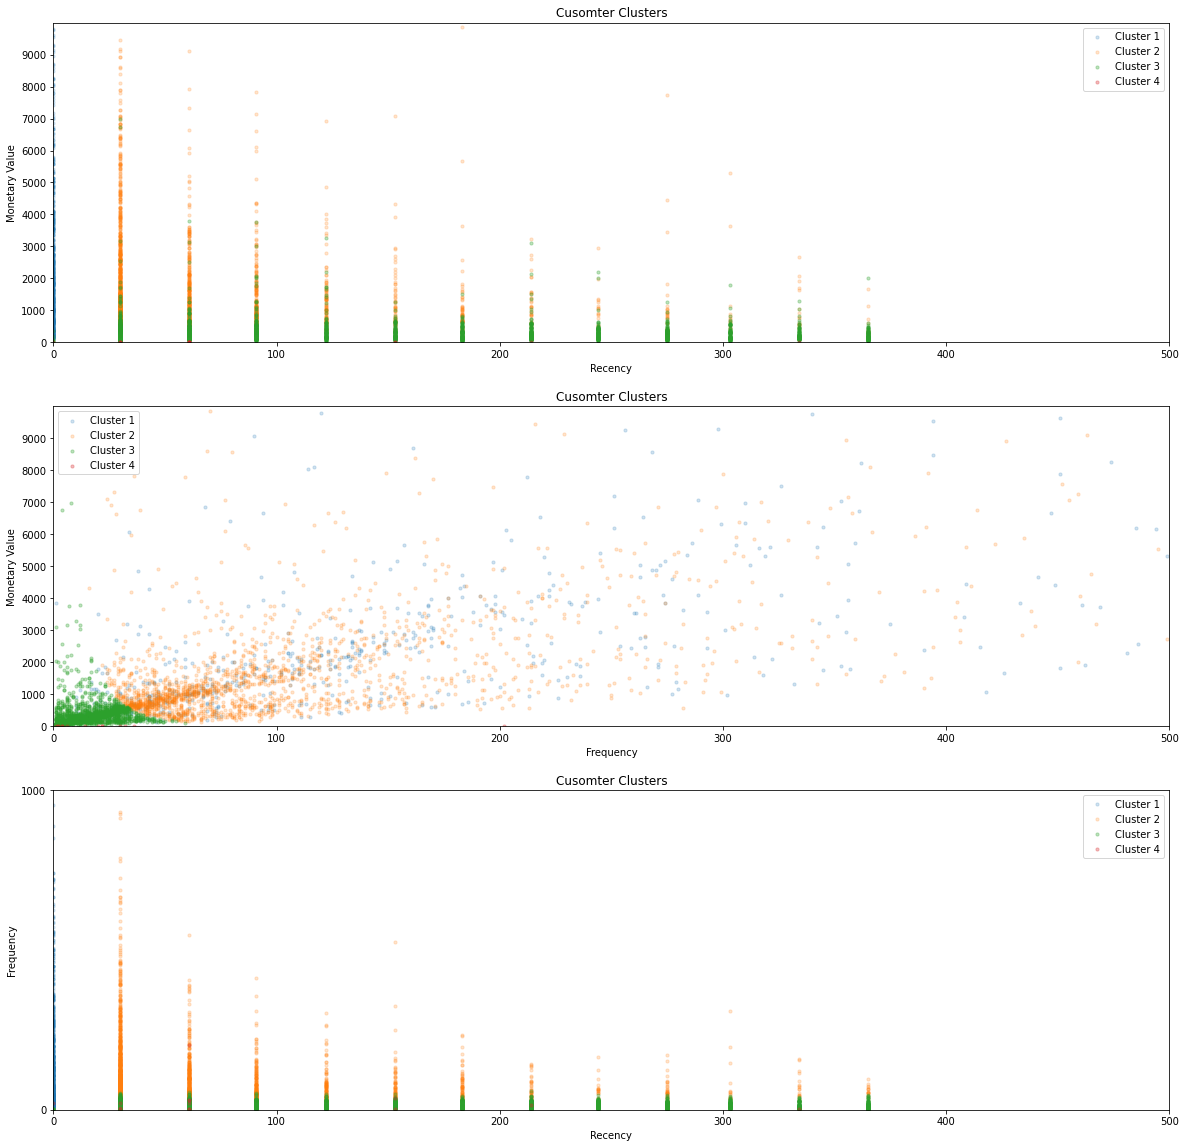

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);
plt.scatter(df_final_sc[cluster_labels == 0].loc[:,'Recency'], df_final_sc[cluster_labels == 0].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 1', alpha=0.2)
plt.scatter(df_final_sc[cluster_labels == 1].loc[:,'Recency'], df_final_sc[cluster_labels == 1].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 2', alpha=0.2)
plt.scatter(df_final_sc[cluster_labels == 2].loc[:,'Recency'], df_final_sc[cluster_labels == 2].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 3', alpha=0.3)
plt.scatter(df_final_sc[cluster_labels == 3].loc[:,'Recency'], df_final_sc[cluster_labels == 3].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 4', alpha=0.3)
plt.xticks(np.arange(0, 1000, 100)) 
plt.yticks(np.arange(0, 10000, 1000))
axes = plt.gca()
axes.set_xlim(0, 500)
axes.set_ylim(0, 10000)
plt.title('Cusomter Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend()



plt.subplot(3, 1, 2);
plt.scatter(df_final_sc[cluster_labels == 0].loc[:,'frequency'], df_final_sc[cluster_labels == 0].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 1', alpha=0.2)
plt.scatter(df_final_sc[cluster_labels == 1].loc[:,'frequency'], df_final_sc[cluster_labels == 1].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 2', alpha=0.2)
plt.scatter(df_final_sc[cluster_labels == 2].loc[:,'frequency'], df_final_sc[cluster_labels == 2].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 3', alpha=0.3)
plt.scatter(df_final_sc[cluster_labels == 3].loc[:,'frequency'], df_final_sc[cluster_labels == 3].loc[:,'Monetary'], s= 10, cmap='rainbow', label = 'Cluster 4', alpha=0.3)
plt.xticks(np.arange(0, 1000, 100)) 
plt.yticks(np.arange(0, 10000, 1000))
axes = plt.gca()
axes.set_xlim(0, 500)
axes.set_ylim(0, 10000)
plt.title('Cusomter Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend()


plt.subplot(3, 1, 3);
plt.scatter(df_final_sc[cluster_labels == 0].loc[:,'Recency'], df_final_sc[cluster_labels == 0].loc[:,'frequency'], s= 10, cmap='rainbow', label = 'Cluster 1', alpha=0.2)
plt.scatter(df_final_sc[cluster_labels == 1].loc[:,'Recency'], df_final_sc[cluster_labels == 1].loc[:,'frequency'], s= 10, cmap='rainbow', label = 'Cluster 2', alpha=0.2)
plt.scatter(df_final_sc[cluster_labels == 2].loc[:,'Recency'], df_final_sc[cluster_labels == 2].loc[:,'frequency'], s= 10, cmap='rainbow', label = 'Cluster 3', alpha=0.3)
plt.scatter(df_final_sc[cluster_labels == 3].loc[:,'Recency'], df_final_sc[cluster_labels == 3].loc[:,'frequency'], s= 10, cmap='rainbow', label = 'Cluster 4', alpha=0.3)
plt.xticks(np.arange(0, 1000, 100)) 
plt.yticks(np.arange(0, 10000, 1000))
axes = plt.gca()
axes.set_xlim(0, 500)
axes.set_ylim(0, 1000)
plt.title('Cusomter Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [70]:
file_name = 'Online_retail_final.xlsx'

df_final_sc.to_excel(file_name)

print("The file name is successfully written")

The file name is successfully written


In [81]:
df_cluster_1 = df_final_sc[['Recency_sc', 'Frequency_sc', 'Monetary_sc','Clusters']]

In [82]:
df_cluster_1.head()

,Recency_sc,Frequency_sc,Monetary_sc,Clusters
0,0.601557,-2.232793,-13.192521,4
1,-2.307388,1.143915,0.998384,1
2,0.445463,-0.181074,0.535044,2
3,0.312252,0.460058,0.523215,2
4,0.589864,-0.630797,-0.355772,3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


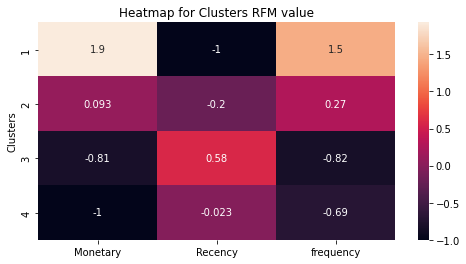

<Figure size 432x288 with 0 Axes>

In [93]:
#Calculate the avg RFM values for the clusters
cluster_avg = df_final_sc.groupby((['Clusters'])).mean()

# Calculate the avg RFM values for the total customer 

population_avg = df_final_sc.mean()

# calculate the

relative_imp = cluster_avg/population_avg -1

plt.figure(figsize=(8,4))
plt.title("Heatmap for Clusters RFM value")
sns.heatmap(data=relative_imp1, annot=True)
plt.show()
plt.savefig("heatmap.png")

In [90]:
relative_imp1 = relative_imp[['Monetary','Recency','frequency']]

In [91]:
relative_imp1

,Monetary,Recency,frequency
Clusters,,,
1,1.930750,-1.000000,1.450732
2,0.092842,-0.200969,0.273322
3,-0.814312,0.582594,-0.820850
4,-1.000000,-0.022799,-0.694038
